# Домашнее задание 4

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 3 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_4

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \triangle_d} f(x) = \frac{1}{2}x^T A x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица (уже умеем генерировать) с $L =1000$, $\mu = 1$, а $\triangle_d$ - вероятностный симплекс:
$$
\triangle_d = \{x ~|~ x_i \geq 0, \sum_{i=1}^d x_i = 1\}.
$$

__(а)__ Для такой задачи напишите итерацию зеркального спуска с дивергенцией Брегмана, порожденной энтропийной функцией. Найдите выражение для итерации метода в явном виде (без подсчетов $\arg\min$).

$x^{k + 1} = \arg\min_{x \in \triangle_d}(γx^TAx^k + \sum_{i=1}^d x_i \log \frac{x_i}{x^k_i})$

The problem is convex so we can use the KKT to find minimum. Let's find the Lagrangian and derive a KKT condition:

$L = γx^TAx^k + \sum_{i=1}^d x_i \log \frac{x_i}{x^k_i}) + ν(\sum_{i=1}^d x_i - 1)$

$∇_{x}L = 0 ⇒ L'|_{x_i} = 0 = γ(Ax^k)_i + \log \frac{x_i}{x^k_i} + 1 + ν$

$x_i = x_i^k \exp{(-ν - γ(Ax^k)_i - 1)} = x_i^k \frac{\exp (-γ(Ax^k)_i)}{\exp(1 + ν)}$

Summing by all dimensions we get:

$\exp(1 + ν) = \sum_{i=1}^d x_i^k \exp (-γ(Ax^k)_i)$

$$x^{k + 1}_i = \frac{x_i^k \exp (-γ(Ax^k)_i)}{\sum_{i=1}^d x_i^k \exp (-γ(Ax^k)_i)}$$

__(б)__ Реализуйте метод зеркального спуска из пункта (а). Постройте для него график сходимости по времени и по итерациям. В качестве критерия сходимости используйте:
$$
\text{gap}(x^k) = \max_{y \in \triangle_d} \langle \nabla f(x^k), x^k - y \rangle,
$$
или усредненную версию $\frac{1}{k} \sum_{i=1}^k \text{gap}(x^i)$. Найдите выражение в явном виде для подсчета $\text{gap}(x^k)$.

$$
\text{gap}(x^k) = \max_{y \in \triangle_d} \langle \nabla f(x^k), x^k - y \rangle = \max_{y \in \triangle_d}  (x^k)^TAx^k - \min_{y \in \triangle_d}y^TAx^k = (x^k)^TAx^k - \min_{i}(Ax^k)_i
$$

In [160]:
import my_optimization as opt
import numpy as np
import importlib

In [161]:
#optimization problem
args = {}
args['L'], args['mu'], args['d'] = 1000, 1, 100
args['A'] = opt.gen_A(args['d'], args['mu'], args['L'])
x_0 = np.array([1/args['d'] for i in range(args['d'])])

args['n'] = 1 #not to have mistake with sara

def f(x, args):
    return 1/2 * x.T @ args['A'] @ x

def grad_f(x, args):
    return args['A'] @ x

In [162]:
times_list, iterations_list, differences_list, labels_list = [], [], [], []

In [163]:
#Mirror Descent
n_iter = 50000
iterations = [i for i in range(n_iter)]
def gamma(k, f, grad_f, x_k, x_true, args):
        return 1 / args['L']

mirror_descent = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = 'gap', 
                        args = args, n_iter = n_iter, gamma_k = gamma, mirror_descent_activate=True)

points_arr, differences_arr, times_arr, acc_arr = mirror_descent.descent()
times_list.append(times_arr)
iterations_list.append(iterations)
differences_list.append(differences_arr)
labels_list.append(r'mirror_descent, $\gamma = \frac{1}{L}$')

100%|██████████| 50000/50000 [00:02<00:00, 17594.98it/s]


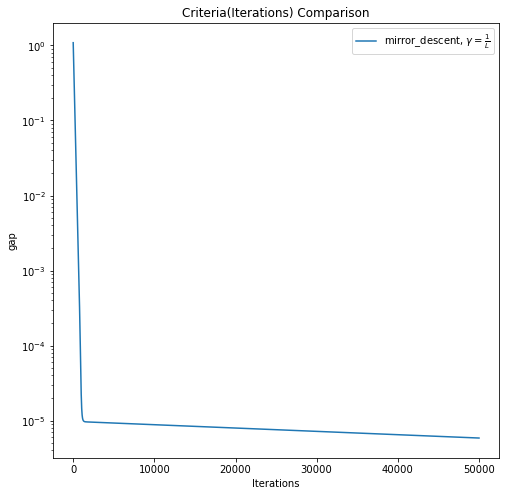

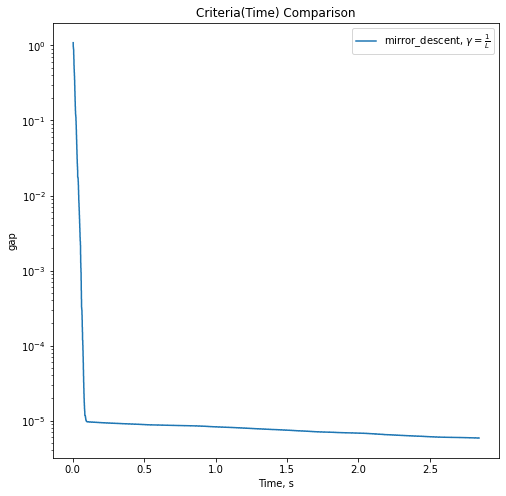

In [164]:
opt.plot_graphs(iterations_list, differences_list, x_label = "Iterations", 
                lines_labels = labels_list, title = 'Criteria(Iterations) Comparison', logscale = True, 
                criteria_type = "gap")

opt.plot_graphs(times_list, differences_list, x_label = "Time, s", 
                lines_labels = labels_list, title = 'Criteria(Time) Comparison', logscale = True, 
                criteria_type = "gap")

__(в)__ Для этой же задачи напишите итерацию метода Франка-Вульфа. Реализуйте этот метод. Постройте для него график сходимости по времени и по итерациям. Добавьте эти графики к графикам для зеркального спуска. Сделайте вывод.

In [165]:
#Frank Wolfe
n_iter = 50000
iterations = [i for i in range(n_iter)]
def gamma(k, f, grad_f, x_k, x_true, args):
        return 2 / (k + 2)

frank_wolfe = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = 'gap', 
                        args = args, n_iter = n_iter, gamma_k = gamma, frank_wolfe_activate=True)

points_arr, differences_arr, times_arr, acc_arr = frank_wolfe.descent()
times_list.append(times_arr)
iterations_list.append(iterations)
differences_list.append(differences_arr)
labels_list.append(r'frank wolfe, $\gamma = \frac{2}{k + 2}$')

100%|██████████| 50000/50000 [00:01<00:00, 26795.39it/s]


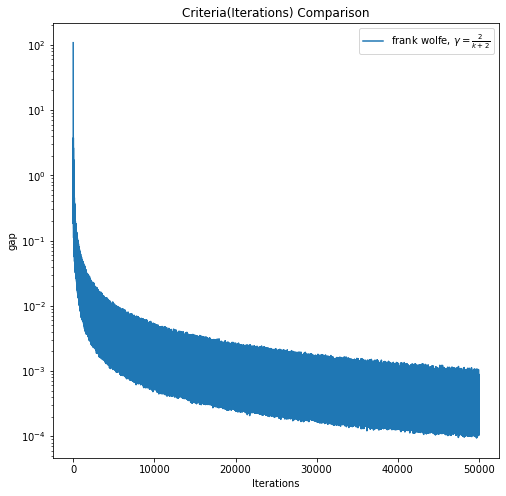

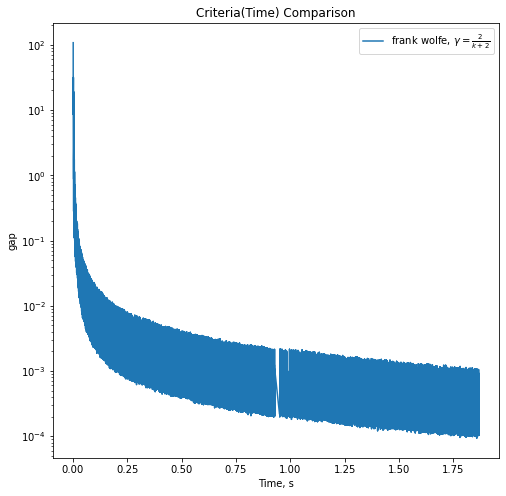

In [166]:
opt.plot_graphs(iterations_list, differences_list, x_label = "Iterations", 
                lines_labels = labels_list, title = 'Criteria(Iterations) Comparison', logscale = True, 
                criteria_type = "gap", specific_slice=[1])

opt.plot_graphs(times_list, differences_list, x_label = "Time, s", 
                lines_labels = labels_list, title = 'Criteria(Time) Comparison', logscale = True, 
                criteria_type = "gap", specific_slice=[1])

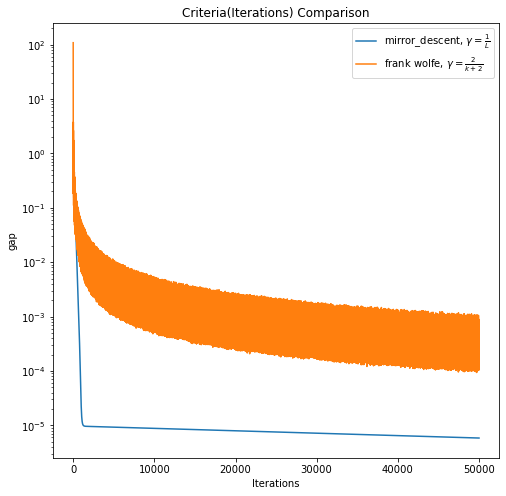

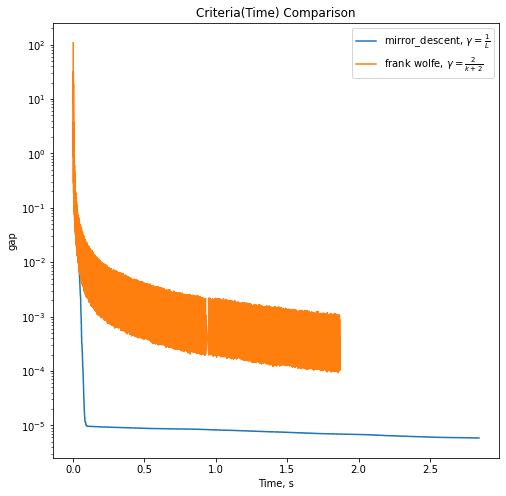

In [167]:
opt.plot_graphs(iterations_list, differences_list, x_label = "Iterations", 
                lines_labels = labels_list, title = 'Criteria(Iterations) Comparison', logscale = True, 
                criteria_type = "gap")

opt.plot_graphs(times_list, differences_list, x_label = "Time, s", 
                lines_labels = labels_list, title = 'Criteria(Time) Comparison', logscale = True, 
                criteria_type = "gap")

**Conclusion**

Here we see that algorithms with theoretical learning rates act like this:

- MD: converges fast
- FW: Takes less time for the same amount of iterations, although converges slower and it is noisier

Here I think MD with theoretical learning rate is the better algorithm for this problem.

__Бонусные пункты__

__(г)__ Реализуйте метод градиентного спуска для нашей задачи. Для этого найдите в Интернете алгоритм евклидовой проекции на вероятностный симплекс. Постройте для градиентного спуска с евклидовой проекцией график сходимости по времени и по итерациям. Добавьте эти графики к графикам для зеркального спуска и метода Франка-Вульфа. Сделайте вывод.

The code was taken from https://gist.github.com/daien/1272551/edd95a6154106f8e28209a1c7964623ef8397246

In [168]:
args['s'] = 1
def euclidean_proj_simplex(v, k, args):
    """ Compute the Euclidean projection on a positive simplex
    Solves the optimisation problem (using the algorithm from [1]):
        min_w 0.5 * || w - v ||_2^2 , s.t. \sum_i w_i = s, w_i >= 0 
    Parameters
    ----------
    v: (n,) numpy array,
       n-dimensional vector to project
    args['s']: int, optional, default: 1,
       radius of the simplex
    Returns
    -------
    w: (n,) numpy array,
       Euclidean projection of v on the simplex
    Notes
    -----
    The complexity of this algorithm is in O(n log(n)) as it involves sorting v.
    Better alternatives exist for high-dimensional sparse vectors (cf. [1])
    However, this implementation still easily scales to millions of dimensions.
    References
    ----------
    [1] Efficient Projections onto the .1-Ball for Learning in High Dimensions
        John Duchi, Shai Shalev-Shwartz, Yoram Singer, and Tushar Chandra.
        International Conference on Machine Learning (ICML 2008)
        http://www.cs.berkeley.edu/~jduchi/projects/DuchiSiShCh08.pdf
    """
    assert args['s']> 0, "Radius args['s']must be strictly positive (%d <= 0)" % args['s']
    n, = v.shape  # will raise ValueError if v is not 1-D
    # check if we are already on the simplex
    if v.sum() == args['s'] and np.alltrue(v >= 0):
        # best projection: itself!
        return v
    # get the array of cumulative sums of a sorted (decreasing) copy of v
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    # get the number of > 0 components of the optimal solution
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - args['s']))[0][-1]
    # compute the Lagrange multiplier associated to the simplex constraint
    theta = float(cssv[rho] - args['s']) / rho
    # compute the projection by thresholding v using theta
    w = (v - theta).clip(min=0)
    return w


In [169]:
#Gradient Descent
n_iter = 50000
iterations = [i for i in range(n_iter)]
def gamma(k, f, grad_f, x_k, x_true, args):
        return 1 / args['L']

gd = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = 'gap', args = args, n_iter = n_iter, gamma_k = gamma, 
                           proj_activate=True, proj_func=euclidean_proj_simplex)

points_arr, differences_arr, times_arr, acc_arr = gd.descent()
times_list.append(times_arr)
iterations_list.append(iterations)
differences_list.append(differences_arr)
labels_list.append(r'gd, $\gamma = \frac{1}{L}$')

100%|██████████| 50000/50000 [00:04<00:00, 10559.36it/s]


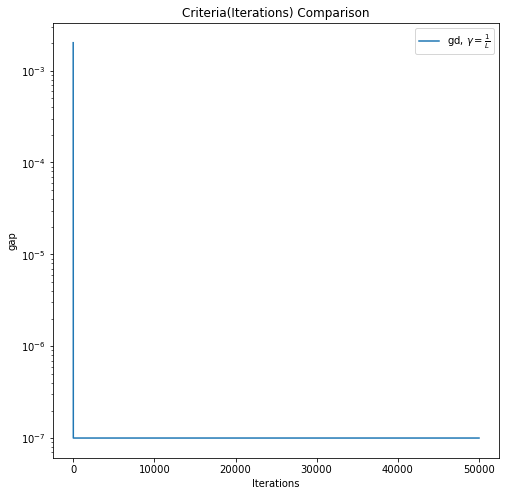

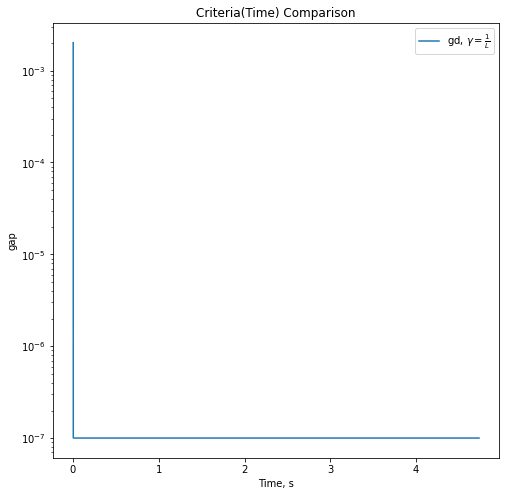

In [170]:
opt.plot_graphs(iterations_list, differences_list, x_label = "Iterations", 
                lines_labels = labels_list, title = 'Criteria(Iterations) Comparison', logscale = True, 
                criteria_type = "gap", specific_slice=[2])

opt.plot_graphs(times_list, differences_list, x_label = "Time, s", 
                lines_labels = labels_list, title = 'Criteria(Time) Comparison', logscale = True, 
                criteria_type = "gap", specific_slice=[2])

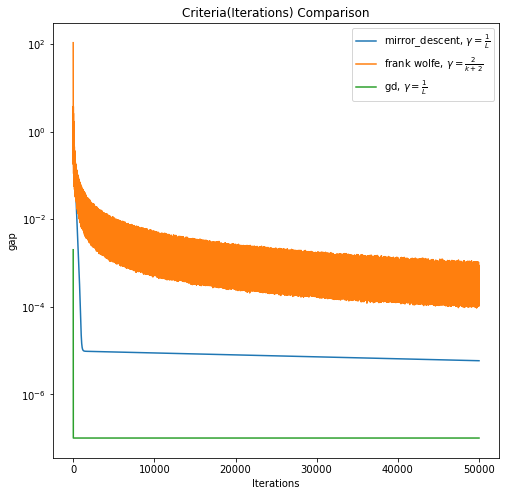

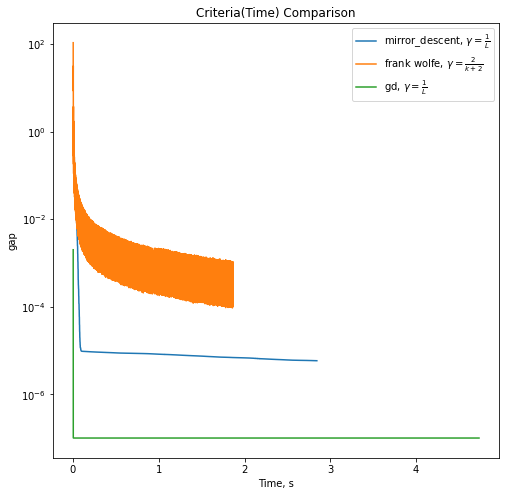

In [171]:
opt.plot_graphs(iterations_list, differences_list, x_label = "Iterations", 
                lines_labels = labels_list, title = 'Criteria(Iterations) Comparison', logscale = True, 
                criteria_type = "gap")

opt.plot_graphs(times_list, differences_list, x_label = "Time, s", 
                lines_labels = labels_list, title = 'Criteria(Time) Comparison', logscale = True, 
                criteria_type = "gap")

### Conclusion

Additional to the previous conclusion we see that GD is better in convergence, but it takes almost twice time for the same amount of iterations, mainly because of projection on simplex, calculated on each step.

So if we don't need to be really precise, the MD would be better, otherwise GD is better

__(д)__ В [работе](https://sci-hub.ru/https://doi.org/10.1137/140992382) представлена ускоренная версия метода Франка-Вульфа (Алгоритм 2 для сильно выпуклой задачи). Он лучше с точки зрения теоретической сходимости по числу вызовов градиента. Реализуйте Алгоритм 2 для нашей задачи. Постройте график сходимости по времени и по количеству подсчетов $\nabla f$ (для предыдущих методов это было эквивалетно итерациям). Добавьте эти графики к графикам для остальных методов которые были получены выше. Сделайте вывод.

In [172]:
args['delta0'] = np.abs(f(points_arr[-1], args) - f(x_0, args))
print(args['delta0'])

0.009148029734784496


In [173]:
importlib.reload(opt)

<module 'my_optimization' from 'c:\\Users\\HP\\Desktop\\МФТИ\\S6\\Optimization S2\\HW\\Kirill-Acharya-MIPT\\my_optimization.py'>

In [174]:
#Accelerated Frank Wolfe
n_iter = 15
N = int(2 * np.sqrt((6*args['L']) / args['mu'])) + 1
gradient_calls = [N * i for i in range(n_iter)] #todo
def gamma_(k, f, grad_f, x_k, x_true, args):
        return 2 / (k + 1)

accelerated_fw = opt.GradientOptimizer(f, grad_f, x_0 = x_0, criterium = 'gap', 
                        args = args, n_iter = n_iter, gamma_k = gamma_, accelerated_fw_activate=True)

points_arr, differences_arr, times_arr, acc_arr = accelerated_fw.descent()
times_list.append(times_arr)
iterations_list.append(gradient_calls)
differences_list.append(differences_arr)
labels_list.append(r'accelerated frank wolfe')

100%|██████████| 15/15 [00:44<00:00,  2.98s/it]


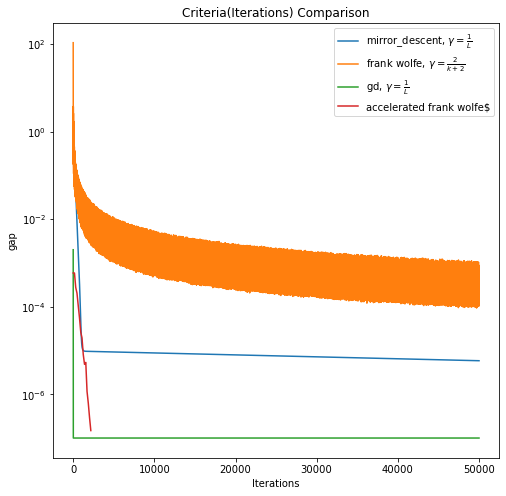

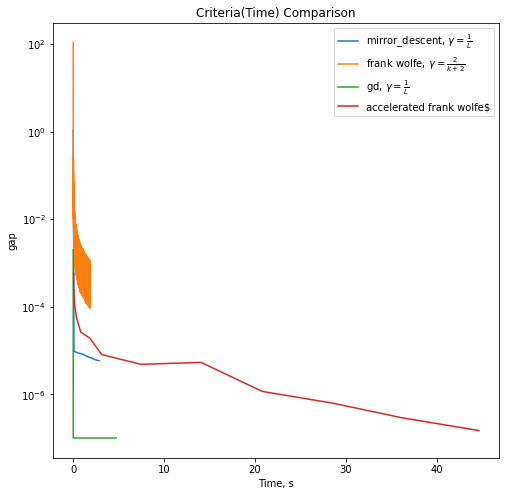

In [175]:
opt.plot_graphs(iterations_list, differences_list, x_label = "Iterations", 
                lines_labels = labels_list, title = 'Criteria(Iterations) Comparison', logscale = True, 
                criteria_type = "gap")

opt.plot_graphs(times_list, differences_list, x_label = "Time, s", 
                lines_labels = labels_list, title = 'Criteria(Time) Comparison', logscale = True, 
                criteria_type = "gap")